
Parâmetros Ajustados:

Modelo Exponencial:
  P0 = 15.710, k = 0.018

Modelo Logístico:
  Pmax = 272.197, r = 0.035, t0 = 115.608

Modelo Logístico Generalizado:
  L = 209.082, k = 0.104, t0 = 130.732, m = 0.239


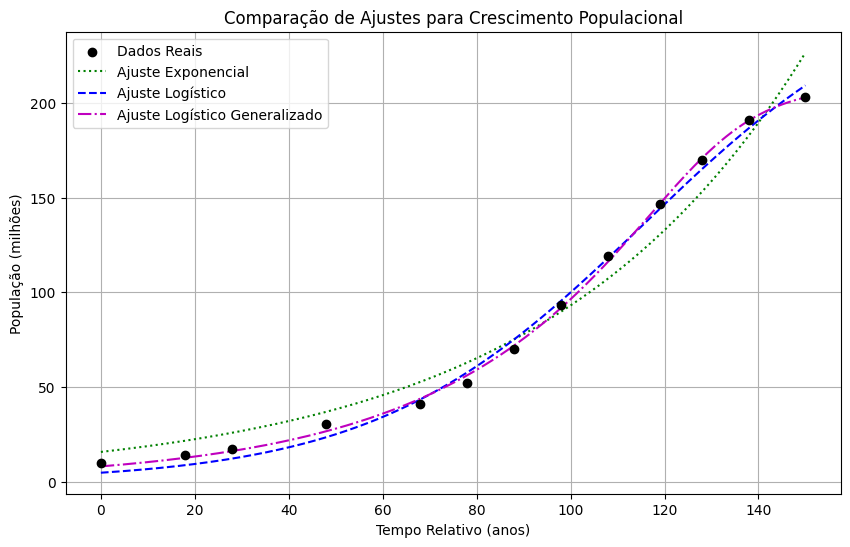

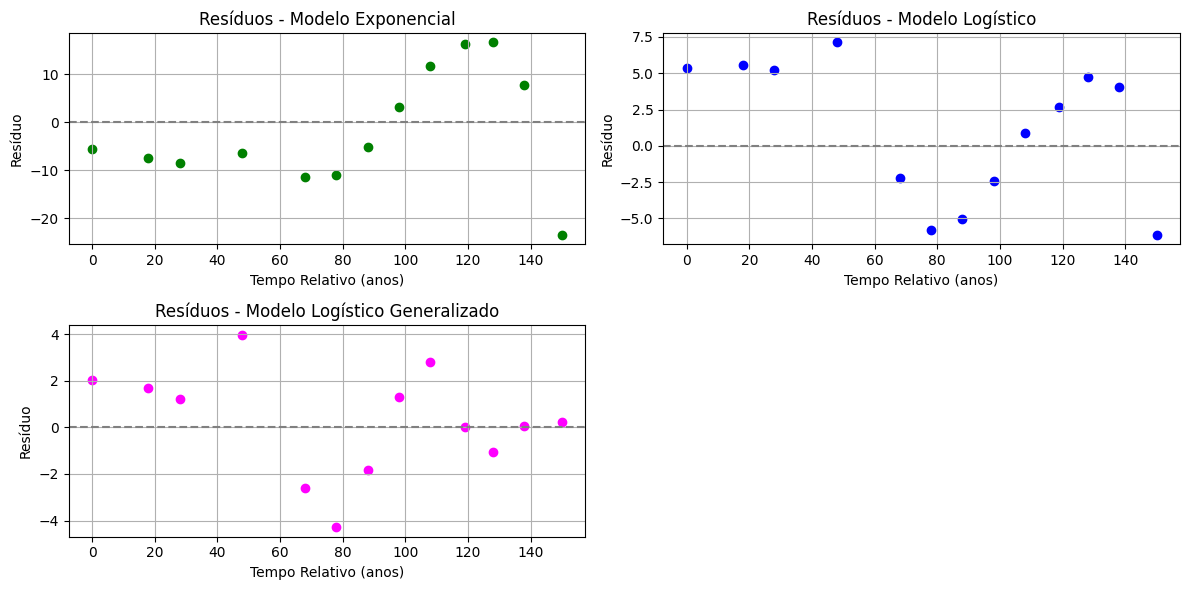

In [1]:
# Importação das bibliotecas necessárias
import numpy as np  # Biblioteca para cálculos matemáticos e manipulação de arrays
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
from scipy.optimize import curve_fit  # Função para ajuste de curvas

# Dados da população do Brasil ao longo de diferentes anos (valores reais)
anos = np.array([0, 18, 28, 48, 68, 78, 88, 98, 108, 119, 128, 138, 150])
populacao = np.array([10.1, 14.3, 17.4, 30.6, 41.2, 51.9, 70.1, 93.1, 119, 146.8, 169.8, 190.8, 203.1])

# Definição da função de crescimento exponencial
def func_exponencial(t, P0, k):
    # Modelo de crescimento exponencial: P(t) = P0 * exp(k * t)
    return P0 * np.exp(k * t)

# Definição da função de crescimento logístico
def func_logistica(t, Pmax, r, t0):
    # Modelo logístico: P(t) = Pmax / (1 + exp(-r * (t - t0)))
    return Pmax / (1 + np.exp(-r * (t - t0)))

# Definição da função logística generalizada
def func_logistica_generalizada(t, L, k, t0, m):
    # Modelo logístico generalizado: P(t) = L / (1 + exp(-k * (t - t0)))^m
    return L / (1 + np.exp(-k * (t - t0)))**m

# Ajuste dos modelos aos dados reais
params_exp, _ = curve_fit(func_exponencial, anos, populacao, p0=[10, 0.02])  # Ajuste do modelo exponencial
params_log, _ = curve_fit(func_logistica, anos, populacao, p0=[250, 0.02, 10])  # Ajuste do modelo logístico
params_log_gen, _ = curve_fit(func_logistica_generalizada, anos, populacao, p0=[250, 0.02, 10, 1])  # Ajuste do modelo logístico generalizado

# Exibindo os parâmetros ajustados para cada modelo
print("\nParâmetros Ajustados:\n")
print("Modelo Exponencial:")
print(f"  P0 = {params_exp[0]:.3f}, k = {params_exp[1]:.3f}")

print("\nModelo Logístico:")
print(f"  Pmax = {params_log[0]:.3f}, r = {params_log[1]:.3f}, t0 = {params_log[2]:.3f}")

print("\nModelo Logístico Generalizado:")
print(f"  L = {params_log_gen[0]:.3f}, k = {params_log_gen[1]:.3f}, t0 = {params_log_gen[2]:.3f}, m = {params_log_gen[3]:.3f}")

# Criando uma sequência de anos para suavizar as curvas ajustadas
anos_suaves = np.linspace(min(anos), max(anos), 500)  # Gera 500 pontos entre os anos mínimo e máximo

# Calculando os valores ajustados para os modelos
pop_exp = func_exponencial(anos_suaves, *params_exp)
pop_log = func_logistica(anos_suaves, *params_log)
pop_log_gen = func_logistica_generalizada(anos_suaves, *params_log_gen)

# Criando o gráfico comparativo dos modelos ajustados
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(anos, populacao, color='black', label='Dados Reais', zorder=3)  # Plota os dados reais
plt.plot(anos_suaves, pop_exp, 'g:', label='Ajuste Exponencial', zorder=2)  # Curva do modelo exponencial
plt.plot(anos_suaves, pop_log, 'b--', label='Ajuste Logístico', zorder=2)  # Curva do modelo logístico
plt.plot(anos_suaves, pop_log_gen, 'm-.', label='Ajuste Logístico Generalizado', zorder=2)  # Curva do modelo logístico generalizado

# Configuração dos rótulos e título do gráfico
plt.xlabel('Tempo Relativo (anos)')
plt.ylabel('População (milhões)')
plt.title('Comparação de Ajustes para Crescimento Populacional')
plt.legend()  # Exibe a legenda
plt.grid()  # Adiciona a grade ao gráfico
plt.show()  # Exibe o gráfico

# ---- Gráficos de Resíduos ----

# Calculando os valores ajustados para os anos reais
pop_exp_real = func_exponencial(anos, *params_exp)
pop_log_real = func_logistica(anos, *params_log)
pop_log_gen_real = func_logistica_generalizada(anos, *params_log_gen)

# Calculando os resíduos (diferença entre os dados reais e os valores ajustados)
residuos_exp = populacao - pop_exp_real
residuos_log = populacao - pop_log_real
residuos_log_gen = populacao - pop_log_gen_real

# Criando o gráfico de resíduos
plt.figure(figsize=(12, 6))

# Resíduos do modelo exponencial
plt.subplot(2, 2, 1)
plt.scatter(anos, residuos_exp, color='green', label='Resíduos Exponencial')
plt.axhline(0, linestyle="--", color="gray")  # Linha horizontal em y=0 para referência
plt.xlabel("Tempo Relativo (anos)")
plt.ylabel("Resíduo")
plt.title("Resíduos - Modelo Exponencial")
plt.grid()

# Resíduos do modelo logístico
plt.subplot(2, 2, 2)
plt.scatter(anos, residuos_log, color='blue', label='Resíduos Logístico')
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Tempo Relativo (anos)")
plt.ylabel("Resíduo")
plt.title("Resíduos - Modelo Logístico")
plt.grid()

# Resíduos do modelo logístico generalizado
plt.subplot(2, 2, 3)
plt.scatter(anos, residuos_log_gen, color='magenta', label='Resíduos Logístico Generalizado')
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Tempo Relativo (anos)")
plt.ylabel("Resíduo")
plt.title("Resíduos - Modelo Logístico Generalizado")
plt.grid()

# Ajuste do layout e exibição
plt.tight_layout()  # Ajusta o espaçamento entre os subplots
plt.show()  # Exibe o gráfico de resíduos
